In [1]:
import pandas as pd
import archeo

In [2]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Prepare Prior

In [3]:
prior = archeo.Prior.from_config("tiny_aligned_spin")

Loaded NRSur3dq8Remnant fit.


100%|██████████| 5000/5000 [00:08<00:00, 561.61it/s]


## Load Parameter Estimation Samples

In [4]:
# This data file is a subset of the LVK posterior samples for GW190521
# For the full dataset, please refer to: https://dcc.ligo.org/P2000158/public

gw190521_pe_samples = pd.read_json("./gw190521_lvk_subsampled.json")
gw190521_pe_samples.head(10)

,mass_1_source,mass_2_source,a_1,a_2
0,84.513663,76.297304,0.687007,0.899445
1,81.059729,69.663127,0.769092,0.878550
2,92.370429,86.105830,0.540142,0.949552
3,77.363091,67.721241,0.088123,0.973257
4,99.454443,41.802952,0.710768,0.976182
5,89.774109,72.749785,0.096520,0.859641
6,65.693613,63.273635,0.664623,0.867052
7,85.314123,58.547913,0.604760,0.867737
8,88.031480,85.329605,0.741590,0.659539
9,71.147886,65.844700,0.914395,0.073000


## Infer ancestor samples

In [5]:
ancestors_bh1 = prior.to_posterior(
    mass_posterior=gw190521_pe_samples["mass_1_source"],
    spin_posterior=gw190521_pe_samples["a_1"]
)
ancestors_bh1.head(10)

100%|██████████| 5000/5000 [00:12<00:00, 390.49it/s]


2025-11-08T02:19:14Z [archeo.core.prior | WARNING]: 903 / 5000 samples could not be recovered from the prior.


,m_1,m_2,k_1,k_2,m_ret,m_ret_err,v_f,v_f_err,chi_1,chi_2,...,k_f,a_f,a_1,a_2,chi_eff,chi_p,min_v_esc,l,original_a_f,original_m_f
0,56.807284,10.045555,0,0,0.983024,0.000147,"[0.00031796378658697155, 0.0002404215978572215...","[1.5124690533317877e-05, 1.5707690726432974e-0...","(0.0, 0.0, 0.07632719366342322)","(0.0, 0.0, 0.9545757671639021)",...,119.505379,0.444176,0.076327,0.954576,0.208296,0.0,119.505379,0.0004,0.456149,65.776486
1,59.139902,15.911495,0,0,0.963412,0.000139,"[-0.00023546780394241283, 1.7411760354947028e-...","[8.288770264452005e-06, 1.3540731189701679e-05...","(0.0, 0.0, 0.5236860398616391)","(0.0, 0.0, 0.8835312294979694)",...,70.593402,0.764198,0.523686,0.883531,0.599976,0.0,70.593402,0.0004,0.784819,71.457324
2,71.531182,22.685788,0,0,0.973713,0.000135,"[0.0007355004909358907, 0.0001484246086434209,...","[1.5307296013430054e-05, 1.5213542068321367e-0...","(0.0, 0.0, -0.20628945301448265)","(0.0, 0.0, 0.7627228632586837)",...,224.942422,0.456813,0.206289,0.762723,0.027032,0.0,224.942422,0.0012,0.490862,92.314619
3,50.898592,34.623116,0,0,0.936706,0.000126,"[7.999006103908443e-05, 0.00014760713823479585...","[1.0991301453002006e-05, 1.402400349748932e-05...","(0.0, 0.0, 0.6253915489310714)","(0.0, 0.0, 0.23228237667484364)",...,50.331464,0.827838,0.625392,0.232282,0.466243,0.0,50.331464,0.0008,0.875057,79.696677
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.169938,83.604518
5,67.158265,17.207332,0,0,0.967557,0.000130,"[1.6355384263690463e-05, 0.0002235221617455698...","[1.419377703506219e-05, 1.5715579487711452e-05...","(0.0, 0.0, 0.5692808401490708)","(0.0, 0.0, -0.7026799447732435)",...,67.189406,0.753571,0.569281,0.702680,0.309850,0.0,67.189406,0.0014,0.769092,81.059729
6,52.879382,20.394810,0,0,0.970454,0.000144,"[0.0006235397799084672, -9.024110870305888e-05...","[4.2519531082058204e-05, 3.5624756524062426e-0...","(0.0, 0.0, -0.19053147415881366)","(0.0, 0.0, -0.013101795196032384)",...,188.880030,0.496416,0.190531,0.013102,-0.141146,0.0,188.880030,0.0006,0.494414,71.471027
7,55.557975,32.397743,0,0,0.944302,0.000125,"[0.00036902844799429127, 8.887346954303728e-05...","[1.5173553839617617e-05, 1.560345347075874e-05...","(0.0, 0.0, 0.6731801569930314)","(0.0, 0.0, -0.332098409472559)",...,113.795029,0.803444,0.673180,0.332098,0.302894,0.0,113.795029,0.0006,0.799370,83.112215
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.155479,101.056365
9,52.272354,24.739181,0,0,0.974247,0.000148,"[0.00022282164373879897, -0.001010748238382026...","[1.9156383836055934e-05, 1.876102577531256e-05...","(0.0, 0.0, -0.8774779596445711)","(0.0, 0.0, -0.42634636431965334)",...,310.290478,0.282864,0.877478,0.426346,-0.732556,0.0,310.290478,0.0002,0.327673,75.703424


## Visualize Prior

In [6]:
from archeo.visualization.distribution import (
    distribution_summary,
    kick_against_spin_cmap,
    kick_distribution_on_spin,
)

(<Figure size 600x800 with 4 Axes>,
 array([<Axes: xlabel='Parent Mass Ratio $q$', ylabel='PDF'>,
        <Axes: xlabel='Remnant Mass $m_f$ [$M_{\\odot}$]', ylabel='PDF'>,
        <Axes: xlabel='Recoil Kick $v_f$ [$kms^{-1}$]', ylabel='PDF'>,
        <Axes: xlabel='Spin $\\chi_f$', ylabel='PDF'>], dtype=object))

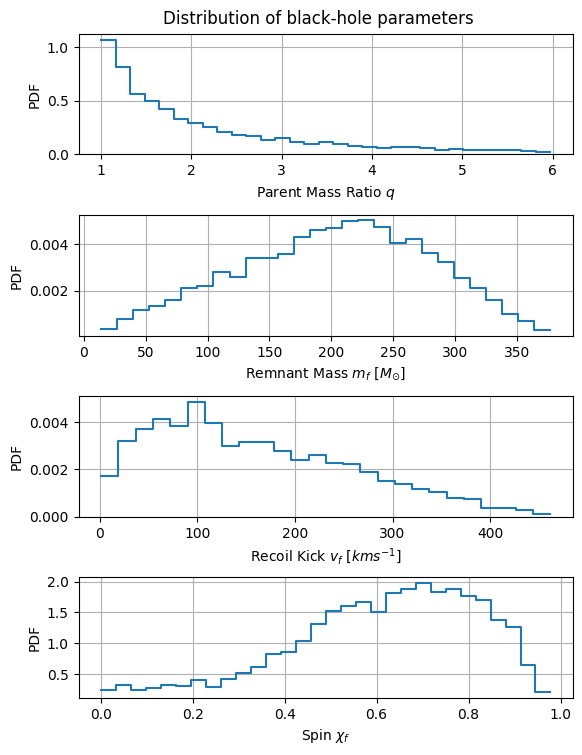

In [7]:
distribution_summary(prior, close=False)

(<Figure size 800x600 with 1 Axes>,
 <ScatterDensityAxes: title={'center': 'Remnant Kick against Remnant Spin'}, xlabel='Remnant Spin $\\chi_f$', ylabel='Remnant Kick $v_f$ [$kms^{-1}$]'>)

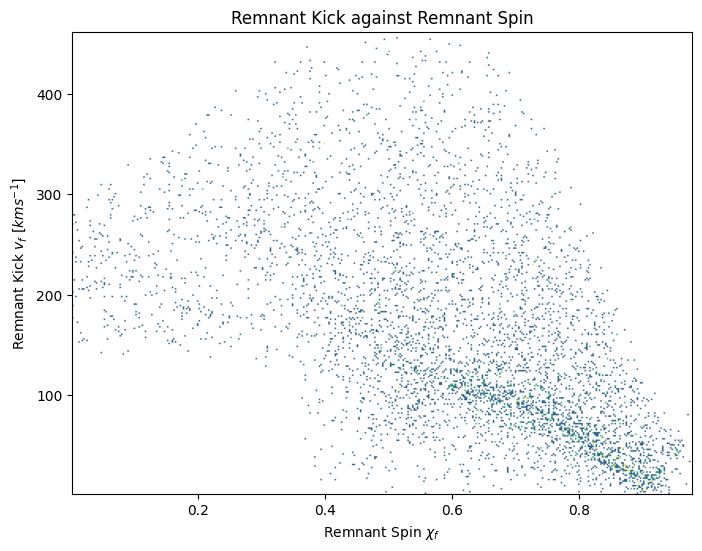

In [8]:
kick_against_spin_cmap(prior, close=False)

(<Figure size 900x400 with 1 Axes>, <Axes: >)

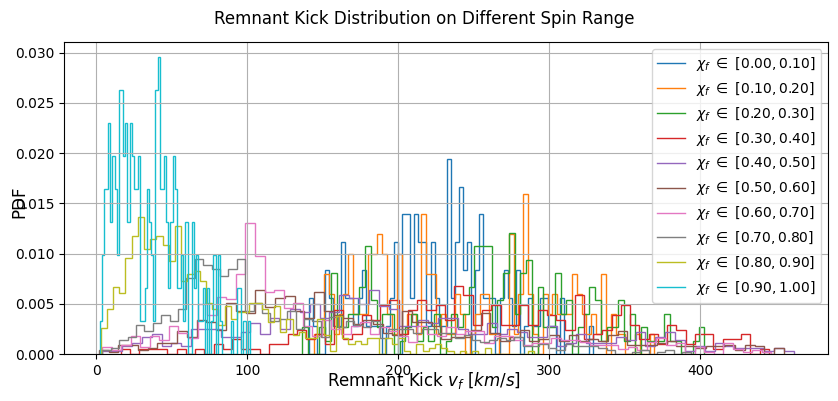

In [9]:
kick_distribution_on_spin(prior, close=False)

## Visualize Inferred Posteriors of BH1's Ancestor

In [10]:
from archeo.visualization.estimation import (
    mass_estimates,
    corner_estimates,
    second_generation_probability_curve,
    effective_spin_estimates,
    precession_spin_estimates,
    table_estimates,
)

(<Figure size 900x400 with 1 Axes>, <Axes: >)

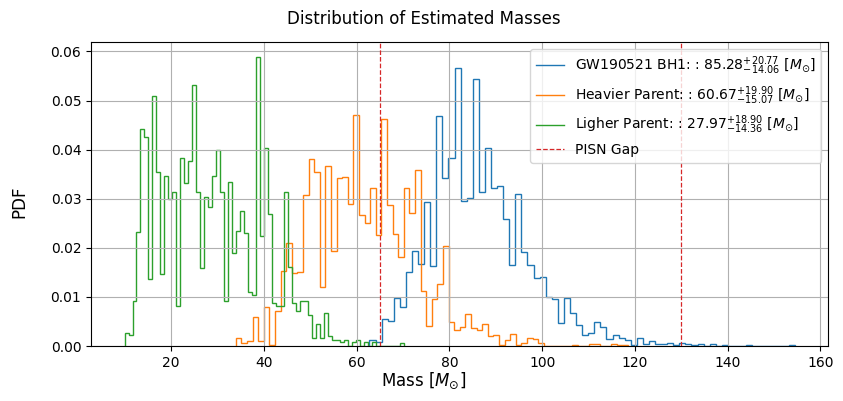

In [11]:
mass_estimates(ancestors_bh1, label="GW190521 BH1", close=False)

(<Figure size 900x900 with 36 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='$m_2$ [$M_{\\odot}$]'>, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='$m_f$ [$M_{\\odot}$]'>, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='$v_f$ [km s$^{-1}$]'>, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='$a_f$'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: xlabel='$m_1$ [$M_{\\odot}$]', ylabel='$\\chi_{eff}$'>,
         <Axes: xlabel='$m_2$ [$M_{\\odot}$]'>,
         <Axes: xlabel='$m_f$ [$M_{\\odot}$]'>,
         <Axes: xlabel='$v_f$ [km s$^{-1}$]'>, <Axes: xlabel='$a_f$'>,
         <Axes: xlabel='$\\chi_{eff}$'>]], dtype=object))

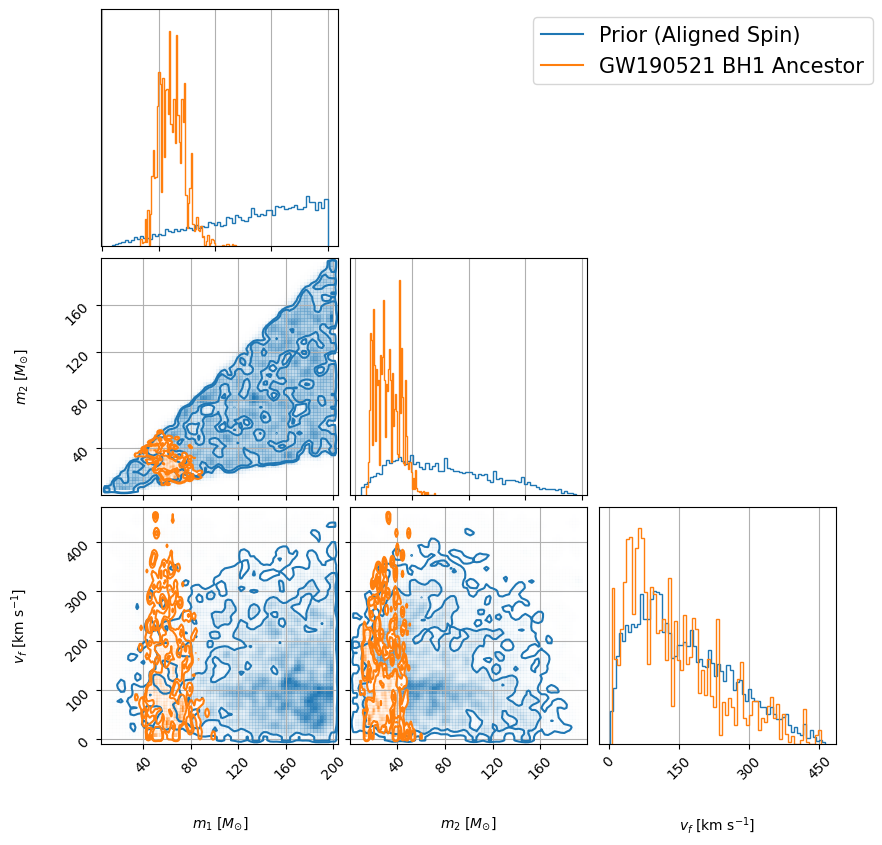

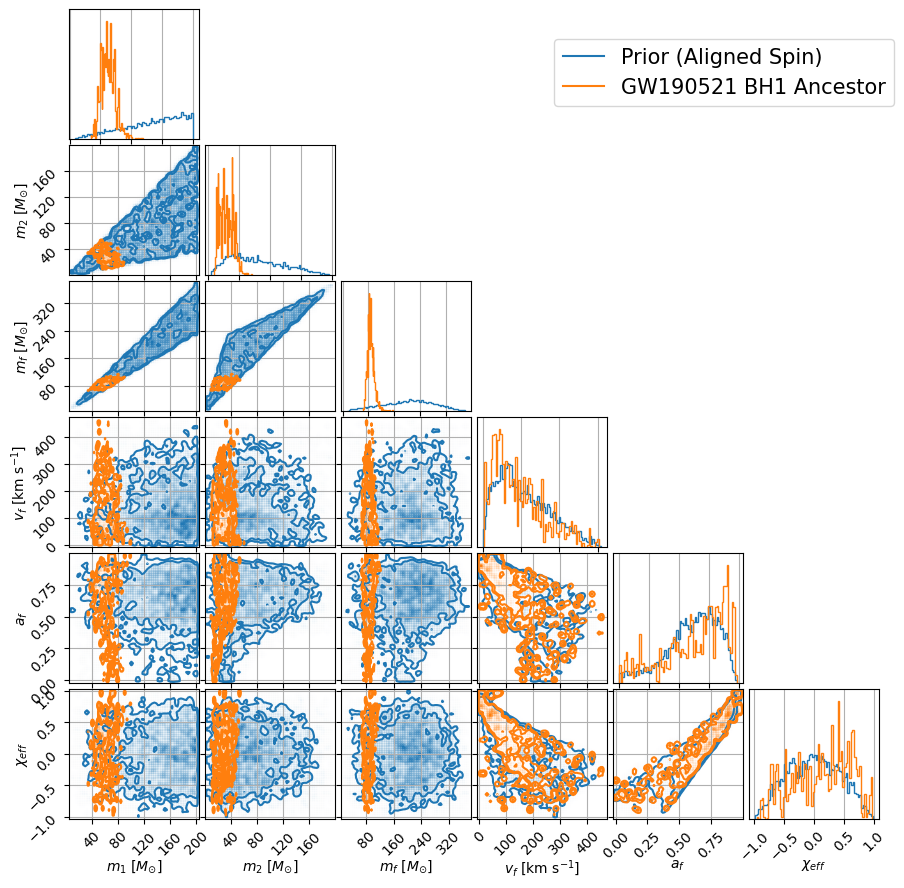

In [12]:
corner_estimates(
    dfs={
        "Prior (Aligned Spin)": prior,
        "GW190521 BH1 Ancestor": ancestors_bh1,
    },
    close=False,
)

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

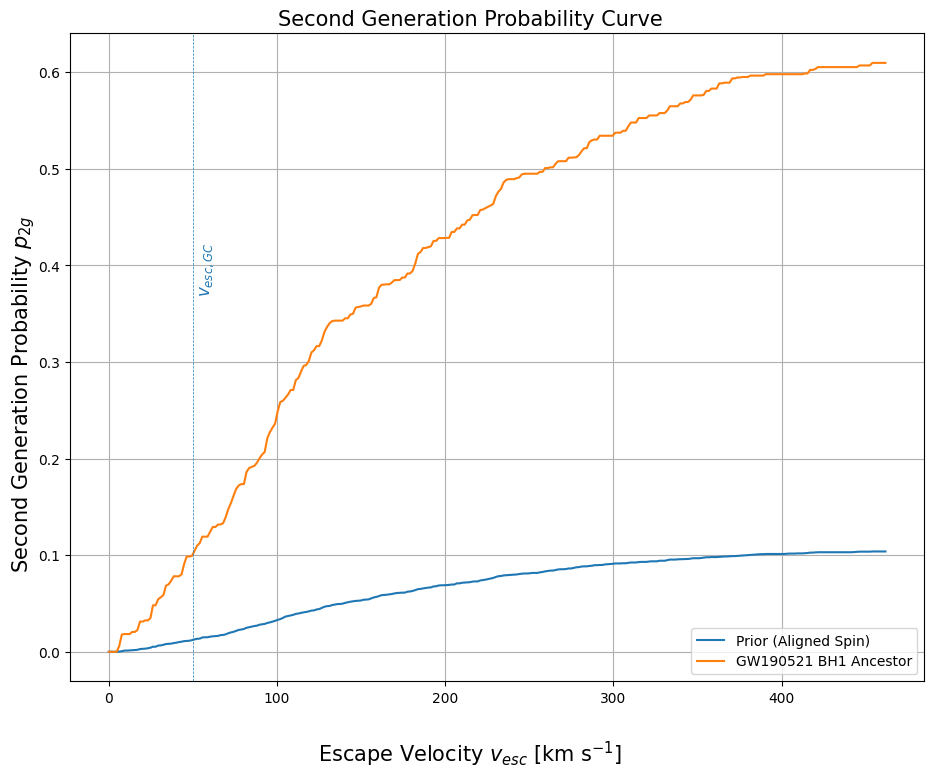

In [13]:
second_generation_probability_curve(
    dfs={
        "Prior (Aligned Spin)": prior,
        "GW190521 BH1 Ancestor": ancestors_bh1,
    },
    close=False,
)

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

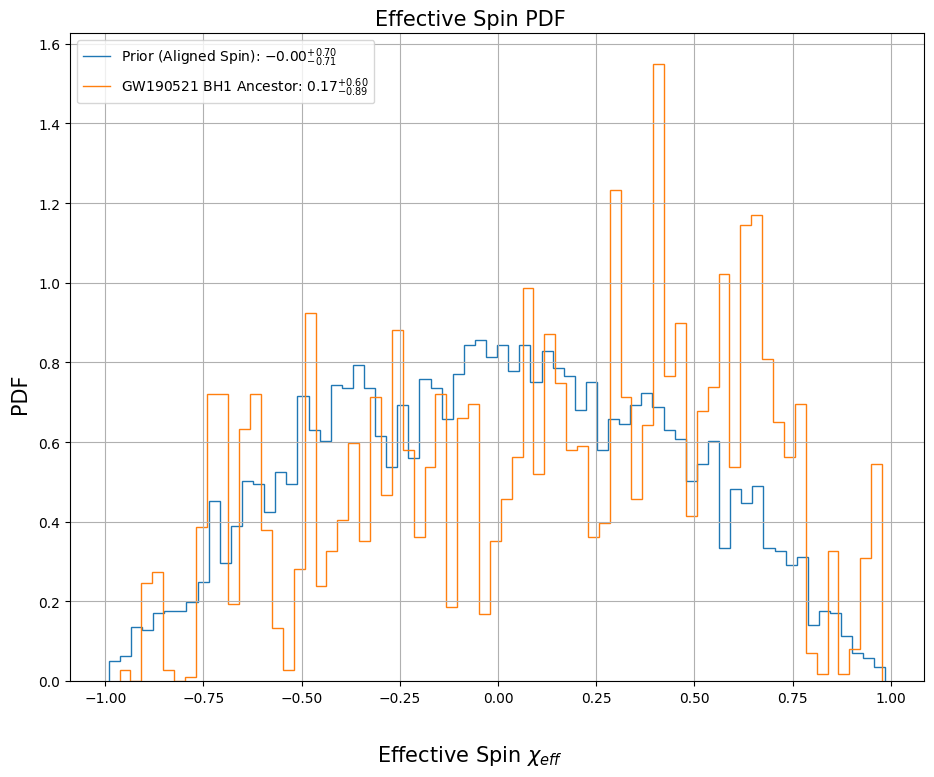

In [14]:
effective_spin_estimates(
    dfs={
        "Prior (Aligned Spin)": prior,
        "GW190521 BH1 Ancestor": ancestors_bh1,
    },
    close=False,
)

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

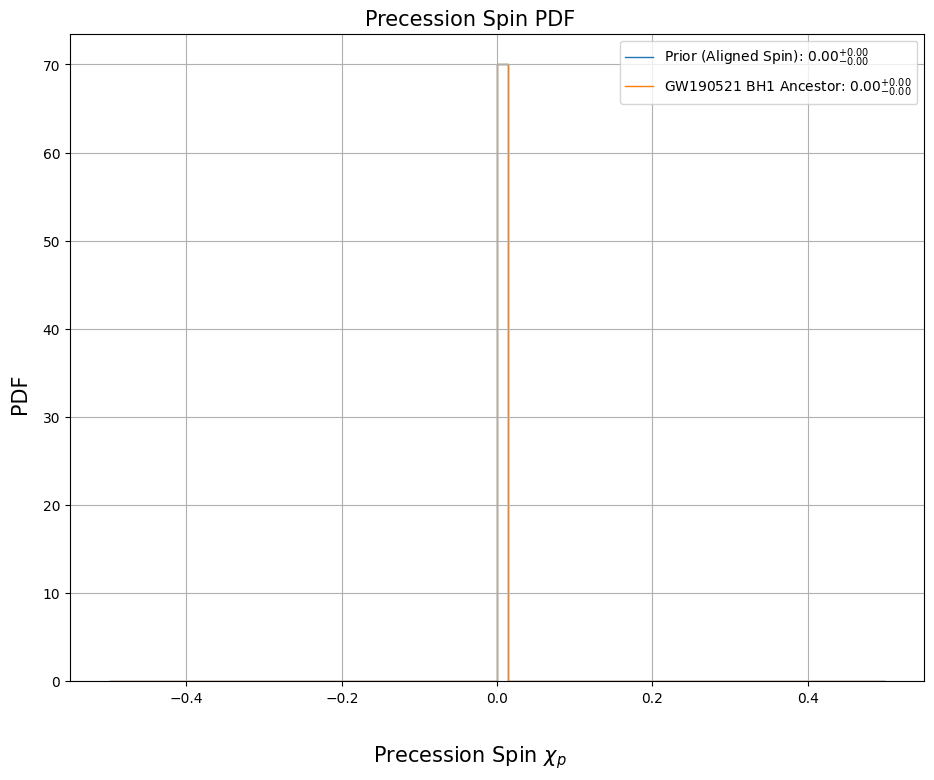

In [15]:
precession_spin_estimates(
    dfs={
        "Prior (Aligned Spin)": prior,
        "GW190521 BH1 Ancestor": ancestors_bh1,
    },
    close=False,
)

In [16]:
table_estimates(
    dfs={
        "Prior (Aligned Spin)": prior,
        "GW190521 BH1 Ancestor": ancestors_bh1,
    }
)

,,Recovery Rate,p2g_GC,p2g_MW,p2g_NSC,p2g_EG,$m_1$,$m_2$,$q$,$m_f$,$a_f$,$v_f$,$\chi_{p}$,$\chi_{eff}$
0,Prior (Aligned Spin),NaN,1.20,10.38,10.38,10.38,$142.09_{-95.62}^{+52.46}$,$71.69_{-53.04}^{+85.34}$,$1.71_{-0.66}^{+3.04}$,$207.58_{-139.53}^{+115.43}$,$0.64_{-0.46}^{+0.26}$,$142.12_{-116.79}^{+209.47}$,$0.00_{-0.00}^{+0.00}$,$-0.00_{-0.71}^{+0.70}$
1,GW190521 BH1 Ancestor,0.8194,8.12,49.94,49.94,49.94,$60.67_{-15.07}^{+19.90}$,$27.97_{-14.36}^{+18.90}$,$2.24_{-1.17}^{+3.00}$,$85.28_{-14.06}^{+20.77}$,$0.71_{-0.59}^{+0.23}$,$113.80_{-93.66}^{+225.41}$,$0.00_{-0.00}^{+0.00}$,$0.17_{-0.89}^{+0.60}$
